# Section 1: Exploratory Data Analysis

## 1.1 Describition of Raw Data

In [1]:
from data.data_loader import load_data

In [2]:
# Load the raw dataset from the directory

raw_data = load_data("diabetes_prediction_dataset.csv")

In [3]:
# Check the head of the dataframe

raw_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Check the shape of the dataframe

raw_data.shape

(100000, 9)

The raw dataset consists of 100,000 observations with 9 columns, including one target variable, "diabetes", and 8 explanatory variables. The objective of this task is to predict diabetes of a person, making it a classification problem. As part of the data exploration process, it is essential to evaluate the proportion of the target variable ("diabetes") in the dataset. This step helps assess the class distribution, which is crucial for understanding potential class imbalance and informing the choice of modeling techniques.

In [5]:
from data.preprocessing import check_binary_column

check_binary_column(raw_data, "diabetes")

Column diabetes contains exactly two unique values: [0 1].
Counts and Proportions in diabetes:
  0: 91500 (91.50%)
  1: 8500 (8.50%)



c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


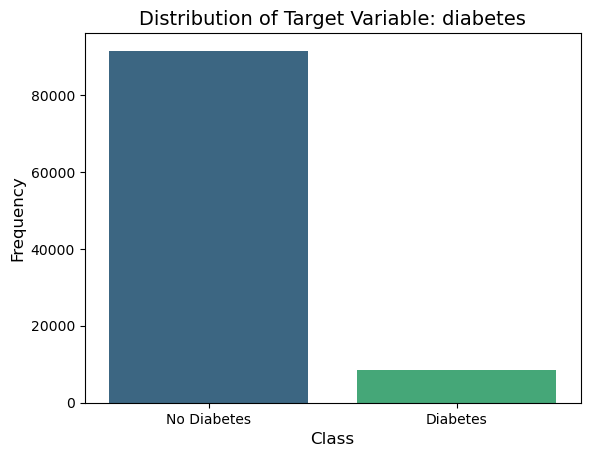

No Diabetes: 91.50%
Diabetes: 8.50%


In [6]:
from data.plotting import visualize_binary

visualize_binary(raw_data, "diabetes", ["No Diabetes", "Diabetes"])

As expected, individuals with diabetes represent a minority in the dataset, comprising only 8.5% of the observations.

To addess class imblanace in classification, there are several strategies including both oversampling and undersampling. Given computational constraints and the large dataset of 100,000 observations, undersampling is opted and the sampled dataset is constructed to ensure a balanced distribution of observations for the target variable, diabetes. A script in data.sample_data.py was executed to generate a sampled data containing 5000 obesrvations. It is important to note that there is no need to rerun the script as the stratified data has already been stored in the raw_data folder. 

In [7]:
stratified_sampled_data = load_data("stratified_diabetes_prediction_dataset.csv")
check_binary_column(stratified_sampled_data, "diabetes")

Column diabetes contains exactly two unique values: [0 1].
Counts and Proportions in diabetes:
  0: 2500 (50.00%)
  1: 2500 (50.00%)



## 1.2 Check for Missing Values and Outliers

In [8]:
from data.preprocessing import check_missing_values, check_outliers, display_unique_values

Firstly, we will focus on categorical variables. Unique values are displayed below

In [9]:
columns_to_check = [
    "gender",
    "hypertension",
    "heart_disease",
    "smoking_history",
]

display_unique_values(raw_data, columns_to_check)

gender: ['Female' 'Male' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


There seems to be no missing values for gender, hypertension and heart_disease. However, for smoking_history, there is a value called "ever" which is likely to be a typo. In data cleaning part, we can convert "ever" back to never.

Subsequently, we check for numerical variables. Seems like there is no missing values for numerical values. 

In [10]:
num_columns_to_check = [
    "age",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level",
]

check_missing_values(raw_data, num_columns_to_check)

{'age': 'No missing values',
 'bmi': 'No missing values',
 'HbA1c_level': 'No missing values',
 'blood_glucose_level': 'No missing values'}

In [11]:
check_outliers(raw_data, num_columns_to_check)

{'age': False, 'bmi': True, 'HbA1c_level': True, 'blood_glucose_level': True}

For the numerical variables, all numerical variables except age contain identified outliers based on the 1.5 IQR method. However, since the stratified sample data will be used for modeling, the process of handling outliers will be addressed in later section.

## 1.3 Visualization

In [12]:
from data.plotting import boxplot_for_categorical_target, count_plot_categorical_target, kde_plot, analyze_and_plot_diabetes_by_age, histogram_for_categorical_target

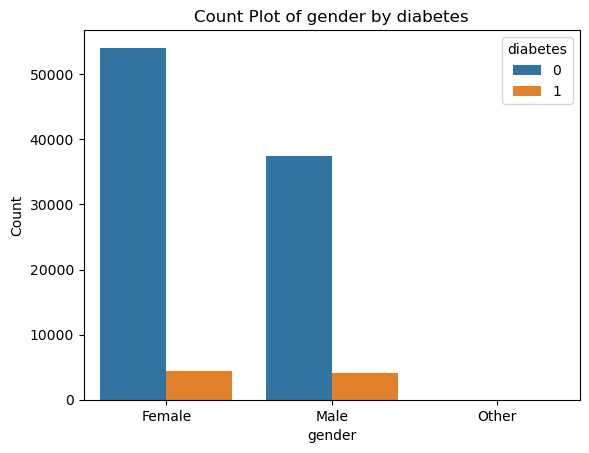


Proportion Table:
   gender  diabetes  proportion
0  Female         0    0.923811
1  Female         1    0.076189
2    Male         0    0.902510
3    Male         1    0.097490
4   Other         0    1.000000


In [13]:
count_plot_categorical_target(raw_data, "gender", "diabetes")

Based on the above graph, male (9.75%) is slightly more likely to get diabetes than female (7.62%).

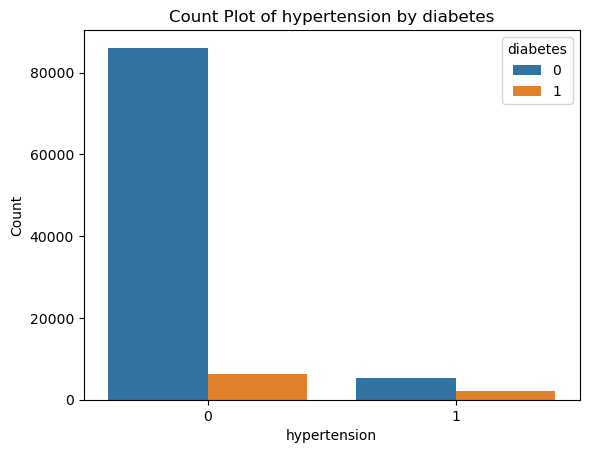


Proportion Table:
   hypertension  diabetes  proportion
0             0         0    0.930692
1             0         1    0.069308
2             1         0    0.721042
3             1         1    0.278958


In [14]:
count_plot_categorical_target(raw_data, "hypertension", "diabetes")

It is evident that having hypertension correlates with a higher proportion of diabetes (27.90% vs 6.93%)

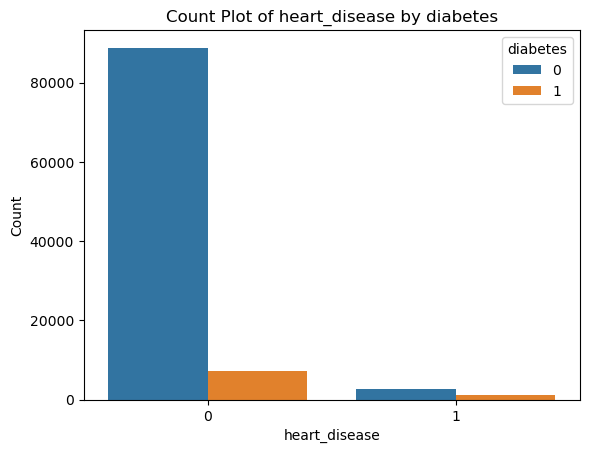


Proportion Table:
   heart_disease  diabetes  proportion
0              0         0    0.924702
1              0         1    0.075298
2              1         0    0.678590
3              1         1    0.321410


In [15]:
count_plot_categorical_target(raw_data, "heart_disease", "diabetes")

It is also evident that having heart disease correlates with an even higher proportion of diabetes (32.14% vs 7.53%)

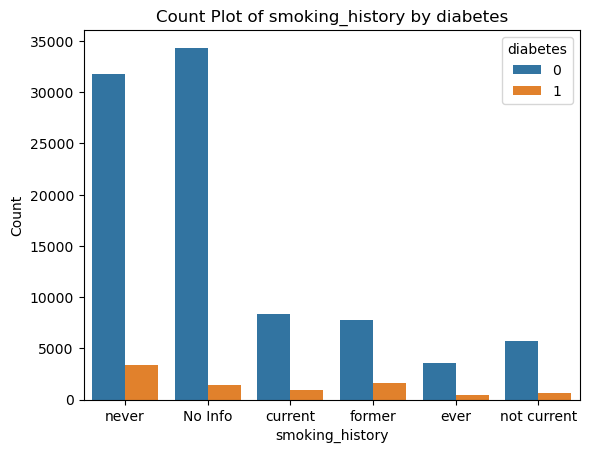


Proportion Table:
   smoking_history  diabetes  proportion
0          No Info         0    0.959404
1          No Info         1    0.040596
2          current         0    0.897911
3          current         1    0.102089
4             ever         0    0.882118
5             ever         1    0.117882
6           former         0    0.829983
7           former         1    0.170017
8            never         0    0.904659
9            never         1    0.095341
10     not current         0    0.892973
11     not current         1    0.107027


In [16]:
count_plot_categorical_target(raw_data, "smoking_history", "diabetes")

Having hypertension and heart disease appears to significantly increase the likelihood of developing diabetes. Interestingly, smoking behavior demonstrates a unique pattern: former smokers exhibit the highest proportion of individuals with diabetes (17.00%), followed by non-current smokers (10.70) and current smokers (10.21%). In contrast, individuals who have never smoked have the lowest proportion of diabetes cases (9.53%), excluding those with missing information. For "No Info", this could potentially due to data reporting bias where the "No Info" group has less interaction with the healthcare system, leading to an underepresentation of diabetes cases. We treat "No Info" as a seperate category instead of missing values.

In addition, we explore the correlation between explanatory categorical variables. 

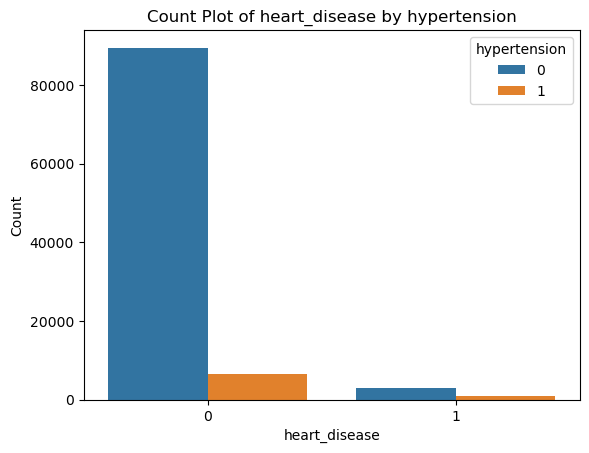


Proportion Table:
   heart_disease  hypertension  proportion
0              0             0    0.931614
1              0             1    0.068386
2              1             0    0.767631
3              1             1    0.232369


In [17]:
count_plot_categorical_target(raw_data, "heart_disease", "hypertension")

It is evident that people are more likely to have hypertension given that they have prior heart disease

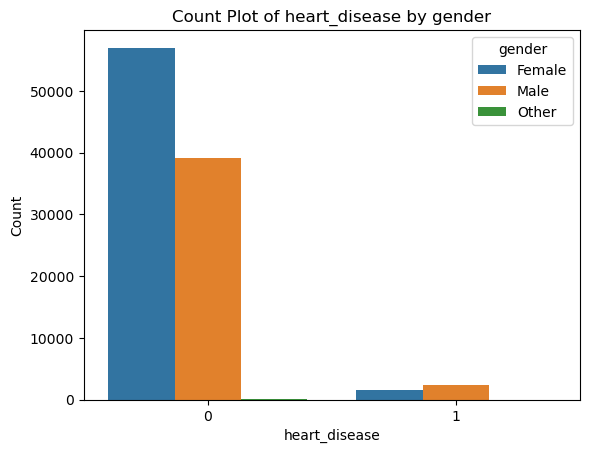


Proportion Table:
   heart_disease  gender  proportion
0              0  Female    0.593287
1              0    Male    0.406525
2              0   Other    0.000187
3              1    Male    0.603754
4              1  Female    0.396246


In [18]:
count_plot_categorical_target(raw_data, "heart_disease", "gender")

Interestingly, heart_disease is much more prevalent in male compared to female. 

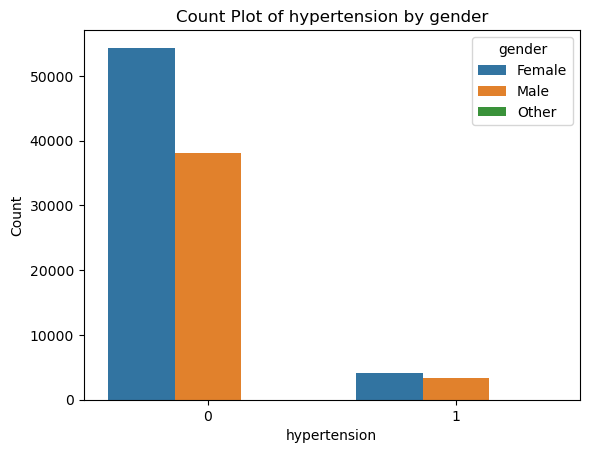


Proportion Table:
   hypertension  gender  proportion
0             0  Female    0.587526
1             0    Male    0.412279
2             0   Other    0.000195
3             1  Female    0.560721
4             1    Male    0.439279


In [19]:
count_plot_categorical_target(raw_data, "hypertension", "gender")

The likelihood of getting hypertension between male and female is similar.

We can also create plots to understand more about the relationship between different categorical variables.

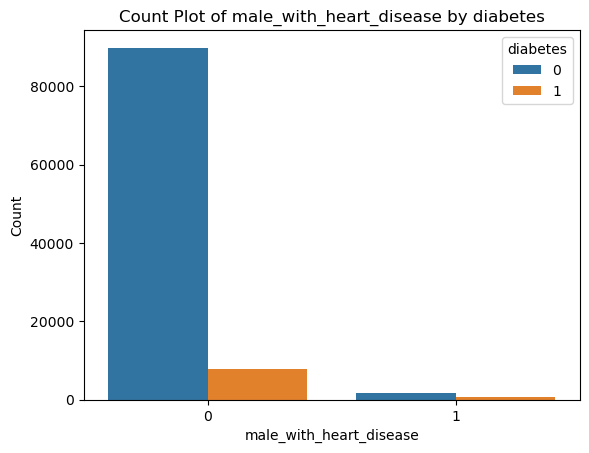


Proportion Table:
   male_with_heart_disease  diabetes  proportion
0                        0         0    0.920518
1                        0         1    0.079482
2                        1         0    0.688655
3                        1         1    0.311345


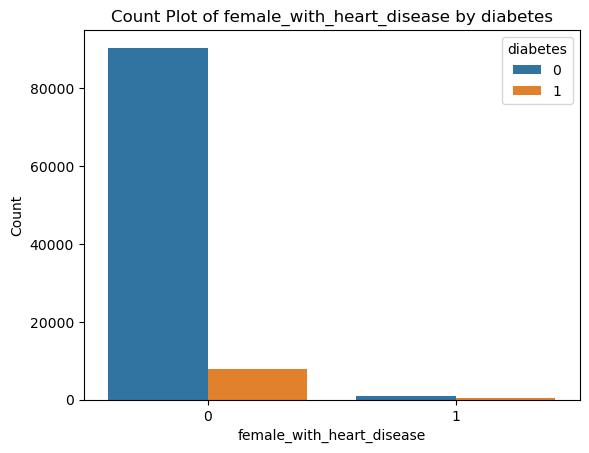


Proportion Table:
   female_with_heart_disease  diabetes  proportion
0                          0         0    0.918995
1                          0         1    0.081005
2                          1         0    0.663252
3                          1         1    0.336748


In [20]:
from data.plotting import add_combined_column
male_heart_df = add_combined_column(raw_data, 'heart_disease', 'gender', 1, "Male", 'male_with_heart_disease')
female_heart_df = add_combined_column(raw_data, 'heart_disease', 'gender', 1, "Female", 'female_with_heart_disease')
count_plot_categorical_target(male_heart_df, "male_with_heart_disease", "diabetes")
count_plot_categorical_target(female_heart_df, "female_with_heart_disease", "diabetes")

We analyzed the relationship between heart disease and diabetes hued by gender. Although males generally exhibit a higher proportion of diabetes and heart disease, the proportion of diabetes among males with diabetes (31.13%) is similar to the proportion of diabetes among female (33.67%). This may suggest that heart disease is a strong determinant of diabetes risk than gender and once heart disease is present, the additional effect of being male on diabetes diminishes.

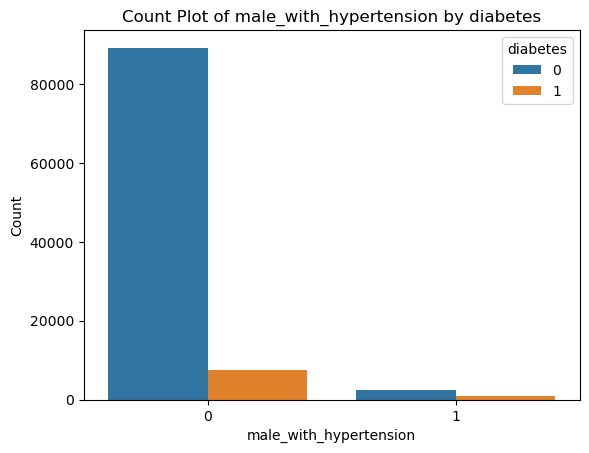


Proportion Table:
   male_with_hypertension  diabetes  proportion
0                       0         0    0.922140
1                       0         1    0.077860
2                       1         0    0.704988
3                       1         1    0.295012


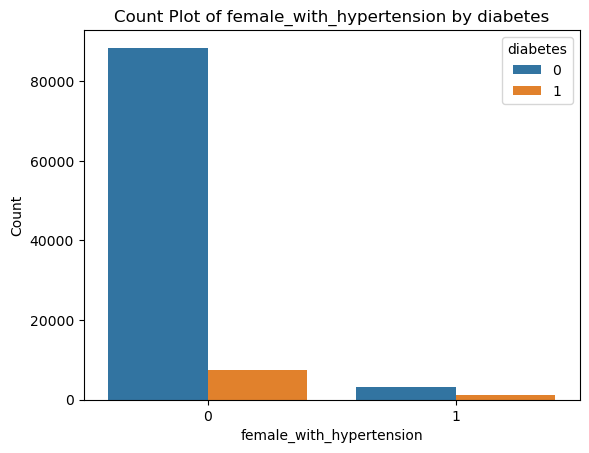


Proportion Table:
   female_with_hypertension  diabetes  proportion
0                         0         0    0.922946
1                         0         1    0.077054
2                         1         0    0.733619
3                         1         1    0.266381


In [21]:
male_hypertension_df = add_combined_column(raw_data, 'hypertension', 'gender', 1, "Male", 'male_with_hypertension')
female_hypertension_df = add_combined_column(raw_data, 'hypertension', 'gender', 1, "Female", 'female_with_hypertension')
count_plot_categorical_target(male_hypertension_df, "male_with_hypertension", "diabetes")
count_plot_categorical_target(female_hypertension_df, "female_with_hypertension", "diabetes")

Males with hypertension exhibit only a slightly higher proportion of diabetes compared to females. This suggests that once hypertension is present, the gender difference in diabetes risk becomes relatively insignificant. These observations indicate that both heart disease and hypertension are likely to be more significant contributing factors in the subsequent modeling process.

Next, we shift our focus to the numerical variables, starting with age.

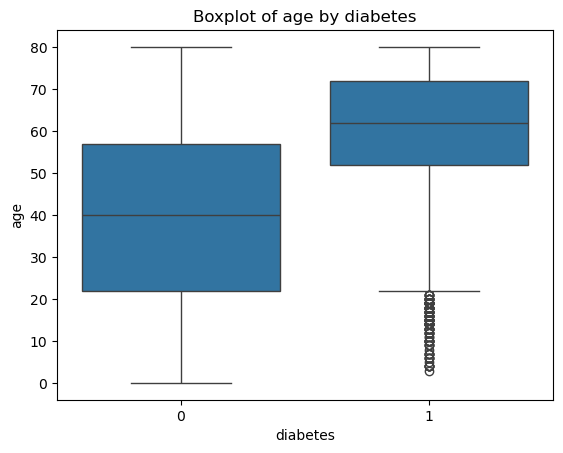

In [22]:
boxplot_for_categorical_target(raw_data, "age", "diabetes")

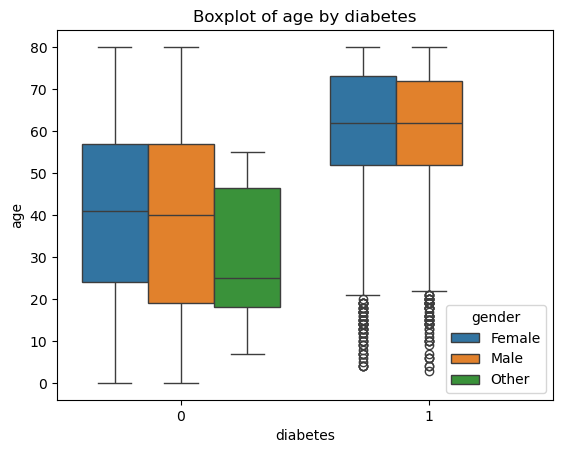

In [23]:
boxplot_for_categorical_target(raw_data, "age", "diabetes", hue = "gender")

It is clear that the likelihood of developing diabetes increases with age while gender appears to have minimal impact on this relationship. In addition, to better visualize the interaction between different variables, we can try to bin the age group and draw more interesting observations. 

c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df.groupby('age_group')[target_col].mean().reset_index()


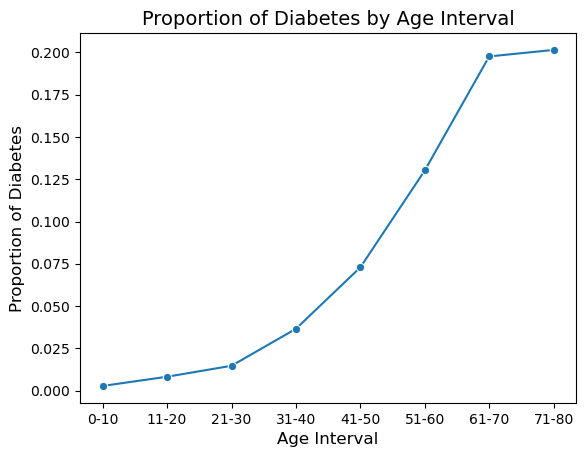

In [24]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

analyze_and_plot_diabetes_by_age(raw_data, age_bins, age_labels, "diabetes")

c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df.groupby(['age_group', hue])[target_col].mean().reset_index()


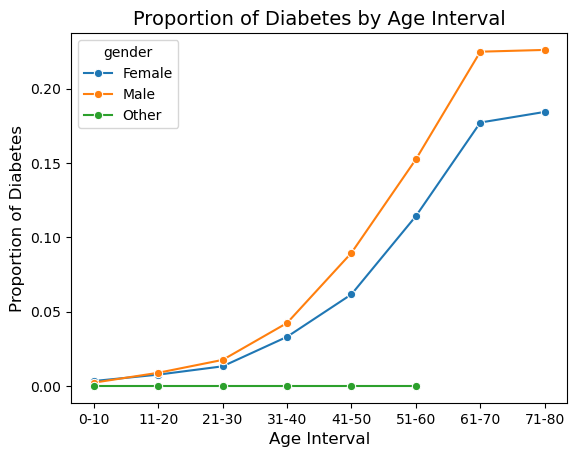

In [25]:
analyze_and_plot_diabetes_by_age(raw_data, age_bins, age_labels, "diabetes", hue = "gender")

Male demonstrates a consistently higher probability of getting diabetes across all age groups. For individuals classified as "Other" gender, the proportion of diabetes remains consistently at 0, likely due to a limited number of observations.

c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df.groupby(['age_group', hue])[target_col].mean().reset_index()


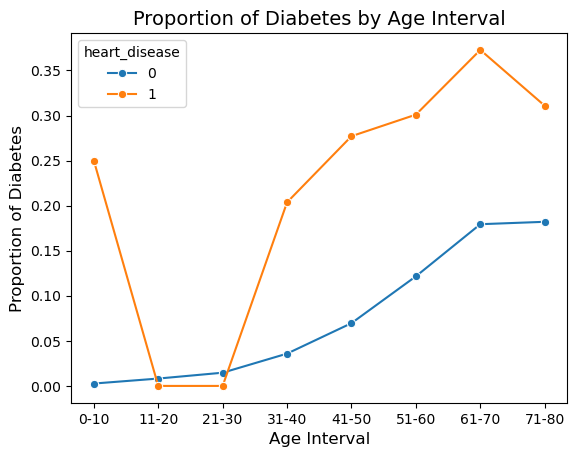

In [26]:
analyze_and_plot_diabetes_by_age(raw_data, age_bins, age_labels, "diabetes", hue = "heart_disease")

Individuals with heart disease generally exhibit a higher proportion of diabetes, except for the age groups 11-20 and 21-30, where having heart disease does not increase the likelihood of diabetes and may even reduce it. Also, for the age group 0-10, having heart_disease significantly increase the chance of diabetes.

c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df.groupby(['age_group', hue])[target_col].mean().reset_index()


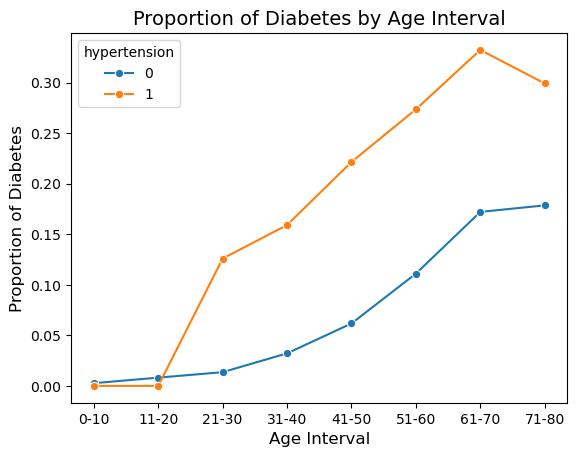

In [27]:
analyze_and_plot_diabetes_by_age(raw_data, age_bins, age_labels, "diabetes", hue = "hypertension")

Hypertension is strongly associated with an increased risk of developing diabetes across all age groups, with the effect becoming more pronounced after age 20.

We also inspect the distribution of the age variable

c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\plotting.py:107: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=column, shade=True, color=color)


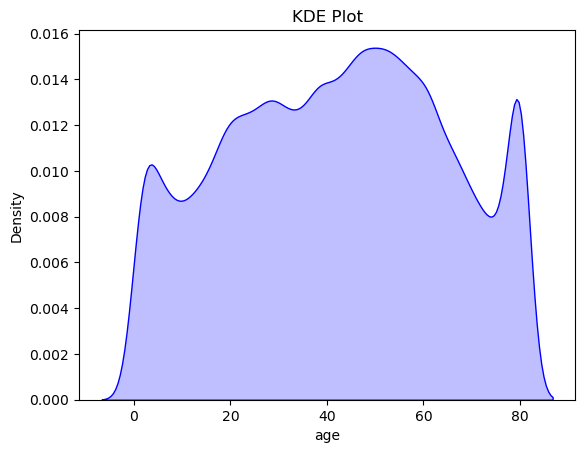

In [28]:
kde_plot(raw_data, "age")

The distribution of age exhibits multiple peaks, particularly in early childhood and the late 70s. One potential approach could be to use the binned age groups to improve interpretability, such as isolating the marginal effect for the 70–80 age group. However, binning results in a loss of information. Both binned and continuous representations of age are valid and will work effectively, but unless there is a specific business need for enhancing interpretability for specific age group, we will retain the age variable in its continuous form during feature engineering.

Moving on, we inspect our remaining three numerical variables: BMI, HBA1C level and Blood Glucose Level

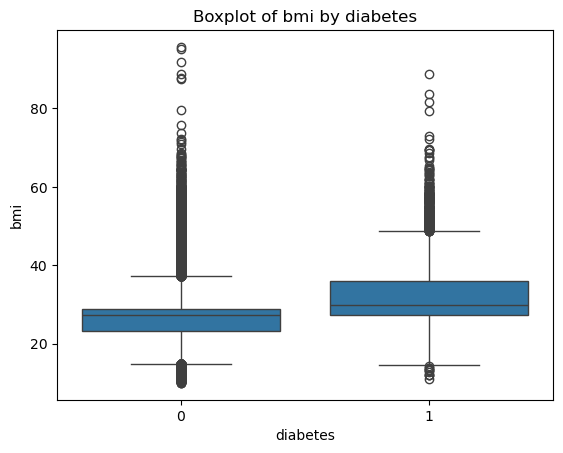

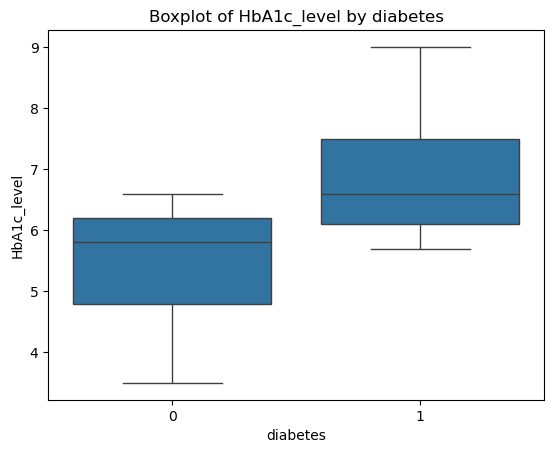

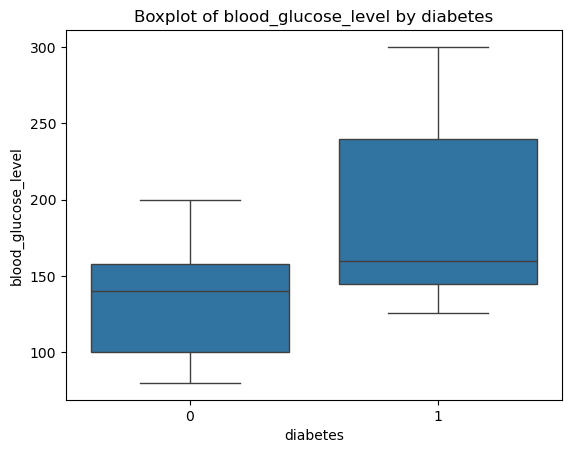

In [29]:
boxplot_for_categorical_target(raw_data, "bmi", "diabetes")
boxplot_for_categorical_target(raw_data, "HbA1c_level", "diabetes")
boxplot_for_categorical_target(raw_data, "blood_glucose_level", "diabetes")

It is evident that probability of diabetes incrases with all three numerical variables.

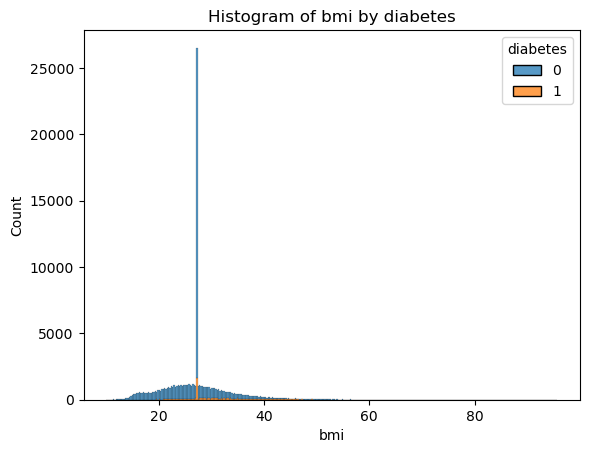

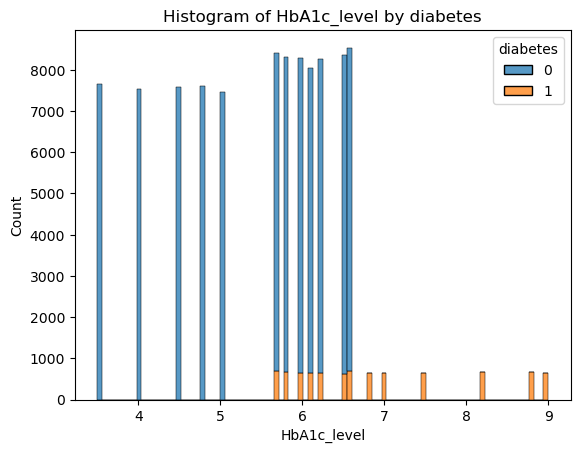

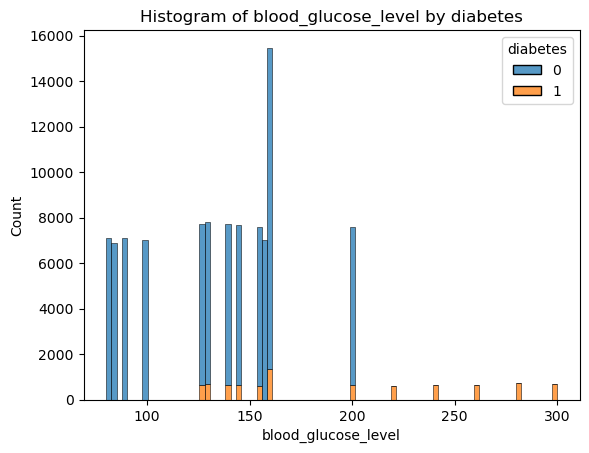

In [30]:
histogram_for_categorical_target(raw_data, "bmi", "diabetes")
histogram_for_categorical_target(raw_data, "HbA1c_level", "diabetes")
histogram_for_categorical_target(raw_data, "blood_glucose_level", "diabetes")

BMI values are predominantly clustered within the 20–30 range, with extremely long tails indicating the presence of outliers. Both HbA1c and blood glucose levels exhibit a multimodal distribution. However, upon closer inspection, both variables are positively skewed, with the majority of observations concentrated on the lower end. This suggests that applying a log transformation could be beneficial for these variables.

## 2.1 Data Cleaning

We have created the stratified dataset in previous section. There are 2 main steps we need to conduct before passing the dataset to a model.

1. Address missing values
2. Converting categorical variables

### 2.1.1 Address Missing Values

In [31]:
stratified_sampled_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,0.32,0,0,No Info,18.31,5.8,130,0
1,Female,22.00,0,0,not current,27.32,6.5,220,1
2,Female,46.00,0,0,never,69.39,5.7,159,1
3,Female,65.00,0,0,never,23.32,5.0,140,0
4,Female,32.00,0,0,No Info,27.32,5.0,85,0


When exploring the data, we realize that there could be a typo in smoking_history. Therefore we convert "ever" back to "never"

In [32]:
stratified_sampled_data["smoking_history"] = stratified_sampled_data["smoking_history"].replace("ever", "never")

### 2.2 Converting Cateogical Variables

In the raw dataset, the gender column contains three unique values: Male, Female, and Other. However, the Other category comprises only a small number of observations, making it statistically insignificant. After stratification, we confirmed that no observations with gender = Other were included in the sampled dataset. As a result, we can assign binary values to the gender column, with 1 representing Male and 0 representing Female instead of one-hot encoding.

In [33]:
stratified_sampled_data["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
from data.data_cleaning import one_hot_encode_column
stratified_sampled_data = one_hot_encode_column(stratified_sampled_data, "gender")

Another column that may require transformation is smoking_history. One approach is to apply one-hot encoding if there is no perceived ordinal relationship between the categories. However, if we assume an ordinal relationship between the levels of smoking_history and the likelihood of diabetes, a potentially more appropriate approach would be to assign numerical values to the categories instead of using one-hot encoding. Based on previous analysis, we observe that former smokers exhibit a higher likelihood of diabetes compared to current smokers, which challenges the assumption of an ordinal relationship between smoking history and diabetes risk. A potential explanation for this pattern is that former smokers may have quit smoking due to underlying health issues, which could also increase their risk of developing diabetes.

Given this observation, assuming an ordinal relationship would be a strong and potentially inaccurate assumption. Therefore, one-hot encoding is applied instead. 

In [35]:
from data.data_cleaning import one_hot_encode_column
stratified_sampled_data = one_hot_encode_column(stratified_sampled_data, "smoking_history")

Lastly, we rearrange the columns to position diabetes as the first column.

In [36]:
stratified_sampled_data = stratified_sampled_data[["diabetes"] + [col for col in stratified_sampled_data.columns if col != "diabetes"]]

In [37]:
stratified_sampled_data.head()

,diabetes,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0.32,0,0,18.31,5.8,130,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,22.00,0,0,27.32,6.5,220,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,46.00,0,0,69.39,5.7,159,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,65.00,0,0,23.32,5.0,140,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,32.00,0,0,27.32,5.0,85,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
from data.data_loader import write_to_parquet
write_to_parquet(stratified_sampled_data)

OSError: Cannot save file into a non-existent directory: 'c:\Users\Asus\OneDrive - University of Cambridge\Desktop\Cambridge\D100 Data Science\Clone\Project\D100_Project-2\data\raw_data'